In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('lendingclub.csv')
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,73582,3500.0,3500.0,225.0,36 months,10.28%,113.39,C,C1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,87023,7500.0,7500.0,800.0,36 months,13.75%,255.43,E,E2,Evergreen Center,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,70686,5000.0,5000.0,0.0,36 months,7.75%,156.11,A,A3,Homemaker,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,83489,2600.0,2600.0,575.0,36 months,8.38%,81.94,A,A5,College Pro Painters,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,74323,6500.0,6500.0,0.0,36 months,9.64%,208.66,B,B4,Air Force,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [3]:
# 데이터 크기
df.shape

(2925493, 141)

In [6]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,...,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount
count,2.925492e+06,2.925492e+06,2.925492e+06,2.925492e+06,2.925488e+06,2.922384e+06,2.925463e+06,2.925492e+06,2.925492e+06,2.925462e+06,...,197824.000000,197824.000000,197824.000000,143638.000000,182076.000000,143638.000000,143637.000000,179240.000000,182076.000000,182076.000000
mean,1.535878e+04,1.535470e+04,1.534005e+04,4.523914e+02,7.993727e+04,1.929648e+01,2.897012e-01,7.005110e+02,7.045112e+02,5.542130e-01,...,12.544398,0.038327,0.067545,2.233427,119.887400,2.233427,2.323148,369.367460,11993.128927,745.504875
std,9.478383e+03,9.477145e+03,9.480634e+03,2.729478e+02,1.117476e+05,1.571977e+01,8.436819e-01,3.376565e+01,3.376653e+01,8.599755e-01,...,8.206977,0.362390,0.371836,0.565689,247.522976,0.565689,6.179453,468.696526,9162.902724,2095.316599
min,5.000000e+02,5.000000e+02,0.000000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,6.140000e+02,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000e+03,8.000000e+03,8.000000e+03,2.535000e+02,4.700000e+04,1.208000e+01,0.000000e+00,6.750000e+02,6.790000e+02,0.000000e+00,...,7.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,104.280000,4749.142500,259.040000
50%,1.300000e+04,1.300000e+04,1.300000e+04,3.823000e+02,6.600000e+04,1.810000e+01,0.000000e+00,6.950000e+02,6.990000e+02,0.000000e+00,...,11.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,249.474420,9967.160000,423.200000
75%,2.000000e+04,2.000000e+04,2.000000e+04,6.039200e+02,9.500000e+04,2.488000e+01,0.000000e+00,7.200000e+02,7.240000e+02,1.000000e+00,...,17.000000,0.000000,0.000000,2.000000,101.940000,2.000000,0.000000,482.532500,17640.670000,679.580000
max,4.000000e+04,4.000000e+04,4.000000e+04,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,8.500000e+02,3.300000e+01,...,121.000000,21.000000,23.000000,4.000000,2797.500000,4.000000,82.000000,11581.820000,42135.550000,40270.980000


In [4]:
# default(종속변수): charged off/default=1, fully paid=0
df['default'] = df['loan_status'].apply(lambda x: 1 if x in ['Charged Off', 'Default'] else 0)

# default 값의 비율: 부도 케이스는 362981, 부도가 아닌 케이스는 2562512.
df['default'].value_counts()

default
0    2562512
1     362981
Name: count, dtype: int64

In [6]:
# 독립변수 선택
features = [
    'loan_amnt',
    'term',
    'installment',
    'emp_length',
    'home_ownership',
    'annual_inc',
    'verification_status',
    'dti',
    'last_fico_range_high',
    'last_fico_range_low',
    'revol_util',
]

df = df[features + ['default', 'verification_status', 'int_rate']].dropna()

In [7]:
original_data = df.copy()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2717583 entries, 1 to 2925491
Data columns (total 16 columns):
 #   Column                Dtype  
---  ------                -----  
 0   loan_amnt             float64
 1   term                  object 
 2   installment           float64
 3   emp_length            object 
 4   home_ownership        object 
 5   annual_inc            float64
 6   verification_status   object 
 7   verification_status   object 
 8   dti                   float64
 9   last_fico_range_high  float64
 10  last_fico_range_low   float64
 11  revol_util            object 
 12  default               int64  
 13  verification_status   object 
 14  verification_status   object 
 15  int_rate              object 
dtypes: float64(6), int64(1), object(9)
memory usage: 352.5+ MB


## 전처리

In [9]:
original_data = df.copy()

In [10]:
# term 전처리:'36 months' → 3, '60 months' → 5로 변환
df['term'] = df['term'].str.extract('(\d+)').astype(float) / 12

In [11]:
# emp_length 전처리

def clean_emp_length(val):
    if pd.isnull(val):
        return np.nan
    val = str(val).strip()
    if val == '< 1 year':
        return 0.5
    if '10+' in val:
        return 10
    digits = ''.join(filter(str.isdigit, val))
    return float(digits) if digits else np.nan

# 전처리 적용
df['emp_length'] = df['emp_length'].apply(clean_emp_length)

# 결측치 제거
df = df.dropna(subset=['emp_length'])

In [12]:
# home_ownership 전처리
df['home_ownership'] = df['home_ownership'].replace({'NONE': 'OTHER', 'ANY': 'OTHER'})
df = pd.get_dummies(df, columns=['home_ownership'], drop_first=True)

In [13]:
df = df.loc[:, ~df.columns.duplicated()]

In [14]:
# verification_status 전처리
df = pd.get_dummies(df, columns=['verification_status'], drop_first=True)

In [15]:
[col for col in df.columns if 'verification_status' in col]

['verification_status_Source Verified', 'verification_status_Verified']

In [16]:
# revol_util 전처리
df['revol_util'] = df['revol_util'].astype(str).str.strip().str.rstrip('%').replace('n/a', np.nan).astype(float)
df = df.dropna(subset=['revol_util'])

In [17]:
# int_rate 전처리
df['int_rate'] = df['int_rate'].astype(str).str.strip().str.rstrip('%').astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2717583 entries, 1 to 2925491
Data columns (total 16 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   loan_amnt                            float64
 1   term                                 float64
 2   installment                          float64
 3   emp_length                           float64
 4   annual_inc                           float64
 5   dti                                  float64
 6   last_fico_range_high                 float64
 7   last_fico_range_low                  float64
 8   revol_util                           float64
 9   default                              int64  
 10  int_rate                             float64
 11  home_ownership_OTHER                 bool   
 12  home_ownership_OWN                   bool   
 13  home_ownership_RENT                  bool   
 14  verification_status_Source Verified  bool   
 15  verification_status_Verified         

## Train-test-split

In [19]:
# 1. 10만 행 무작위 샘플링
df_sampled = df.sample(n=100000, random_state=42)

# 2. 독립변수 / 종속변수 분리
X = df_sampled.drop(columns=['default'])
y = df_sampled['default']

# 3. stratified train-test-split (20% test / 20% val / 60% train)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size = 0.2, 
    random_state=42, 
    stratify=y)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size = 0.25, 
    random_state=42,
    stratify=y_temp)

# 4. original_data split
original_sample = original_data.loc[df_sampled.index]
original_temp, original_test = train_test_split(original_sample, stratify=y, test_size=0.2, random_state=42)
original_train, original_val = train_test_split(original_temp, stratify=y_temp, test_size=0.25, random_state=42)

# 5. 확인
print("train class ratio:\n", y_train.value_counts(normalize=True))
print("validation class ratio:\n",y_val.value_counts(normalize=True))
print("test class ratio:\n", y_test.value_counts(normalize=True))

train class ratio:
 default
0    0.876717
1    0.123283
Name: proportion, dtype: float64
validation class ratio:
 default
0    0.87675
1    0.12325
Name: proportion, dtype: float64
test class ratio:
 default
0    0.8767
1    0.1233
Name: proportion, dtype: float64


In [20]:
# Train set downsampling
from sklearn.utils import resample

X_train_balanced = pd.concat([X_train, y_train], axis=1)
default_data = X_train_balanced[X_train_balanced['default']==1]
non_default_data = X_train_balanced[X_train_balanced['default']==0]

non_default_downsampled = resample(
    non_default_data,
    replace=False,
    n_samples = len(default_data),
    random_state=42)

balanced_train_data = pd.concat([default_data, non_default_downsampled])

X_train = balanced_train_data.drop(columns=['default'])
y_train = balanced_train_data['default']

###### 지금부터 threshold에 따라서
###### 1. 먼저 예측치를 구하고
###### 2. 하나의 threshold에 따라서
###### 3. 우리의 목적함수를 설정 $s = \frac{\mu_r - r_f}{\sigma_{r}}$
###### 4. threshold에 따라 분류된 결과에 따라 sharpe ratio가 어떻게 구해지는지 판단

In [21]:
from sklearn.ensemble import RandomForestClassifier
from itertools import product
from random import sample

In [22]:
# 1. 하이퍼파라미터 정의
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

thresholds = [0.2, 0.3, 0.4]


# 2. 모든 조합 생성 및 샘플링
all_combinations = list(product(*param_grid.values()))
param_combinations = sample(all_combinations, min(20, len(all_combinations)))

# 너무 많으면 일부만 샘플링 (여기선 20개 이하라면 전부 사용)
sample_size = min(20, len(all_combinations))
param_combinations = sample(all_combinations, sample_size)

#3. 하이퍼파라미터 이름 리스트
param_names = list(param_grid.keys())

In [23]:
# 연환산 수익률 계산 전 original_data의 int_rate와 term 역시 전처리
original_val['int_rate'] = (
    original_val['int_rate']
    .astype(str).str.strip().str.rstrip('%').astype(float)
)

original_val['term'] = (
    original_val['term'].astype(str).str.extract(r'(\d+)').astype(float) / 12
)


# Sharpe Ratio 루프 준비
best_sharpe = -np.inf
best_config = {}

# 전체 루프 구조
for combo in param_combinations:
    params = dict(zip(param_names, combo))
    rf = RandomForestClassifier(**params, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_proba_val = rf.predict_proba(X_val)[:, 1]  # 1의 확률만 추출

    for threshold in thresholds:
        predictions = (y_proba_val >= threshold).astype(int)

        approved = (predictions == 0)
        not_approved = (predictions == 1)

        # 여기에서 연환산 수익률 계산
        annualized_return = (
            approved * (y_val == 0) * (
                ((original_val['loan_amnt'] * ((1 + original_val['int_rate'] / 100) ** original_val['term'])) / original_val['loan_amnt']) ** (1 / original_val['term']) - 1
            ) +
            not_approved * (
                ((original_val['loan_amnt'] * ((1 + 0.03) ** original_val['term'])) / original_val['loan_amnt']) ** (1 / original_val['term']) - 1
            )
        ).dropna()

        mean_ret = annualized_return.mean()
        std_ret = annualized_return.std()
        sharpe = (mean_ret - 0.03) / std_ret if std_ret > 0 else -np.inf

        if sharpe > best_sharpe:
            best_sharpe = sharpe
            best_config = {**params, 'threshold': threshold}

# 결과 출력
print("Best Configuration:")
for k, v in best_config.items():
    print(f"{k}: {v}")
print(f"Best Sharpe Ratio: {best_sharpe:.4f}")

Best Configuration:
n_estimators: 200
max_depth: 5
min_samples_split: 2
min_samples_leaf: 2
max_features: sqrt
bootstrap: True
threshold: 0.4
Best Sharpe Ratio: 1.2322


In [24]:
# original_data의 test data 'int_rate'와 'term'도 전처리
original_test['int_rate'] = original_test['int_rate'].astype(str).str.strip().str.rstrip('%').astype(float)
original_test['term'] = original_test['term'].astype(str).str.extract(r'(\d+)').astype(float) / 12

# 1. 최적 파라미터로 모델 설정
best_config = {
    'n_estimators': 200,
    'max_depth': 5,
    'min_samples_split': 2,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'bootstrap': True
}
threshold = 0.4  # 튜닝된 threshold
risk_free_rate = 0.03

# 2. 모델 훈련 (validation 포함된 전체 train set 사용)
rf_best = RandomForestClassifier(**best_config, random_state=42, n_jobs=-1)
rf_best.fit(X_temp, y_temp)

# 3. 예측 확률 추출 (class 1에 대한 확률)
y_proba = rf_best.predict_proba(X_test)[:, 1]

# 4. threshold 기반 이진화
binary_predictions = (y_proba >= threshold).astype(int)

# 5. 승인 / 미승인 마스크 생성
approved = (binary_predictions == 0)
not_approved = (binary_predictions == 1)

# 6. term을 연도로 변환
years = original_test['term']

# 7. 연환산 수익률 계산
approved_returns = approved * (y_test == 0) * (
    ((original_test['loan_amnt'] * ((1 + original_test['int_rate'] / 100) ** years)) / original_test['loan_amnt']) ** (1 / years) - 1
)

not_approved_returns = not_approved * (
    ((original_test['loan_amnt'] * ((1 + risk_free_rate) ** years)) / original_test['loan_amnt']) ** (1 / years) - 1
)

individual_returns = (approved_returns + not_approved_returns).dropna()

# 8. Sharpe Ratio 계산
mean_return = individual_returns.mean()
std_return = individual_returns.std()
sharpe_ratio = (mean_return - risk_free_rate) / std_return if std_return > 0 else -np.inf

# 9. 결과 출력
print(f"Test Set Sharpe Ratio: {sharpe_ratio:.4f}")


Test Set Sharpe Ratio: 1.3632


### Feature Importance와 Shapely Value

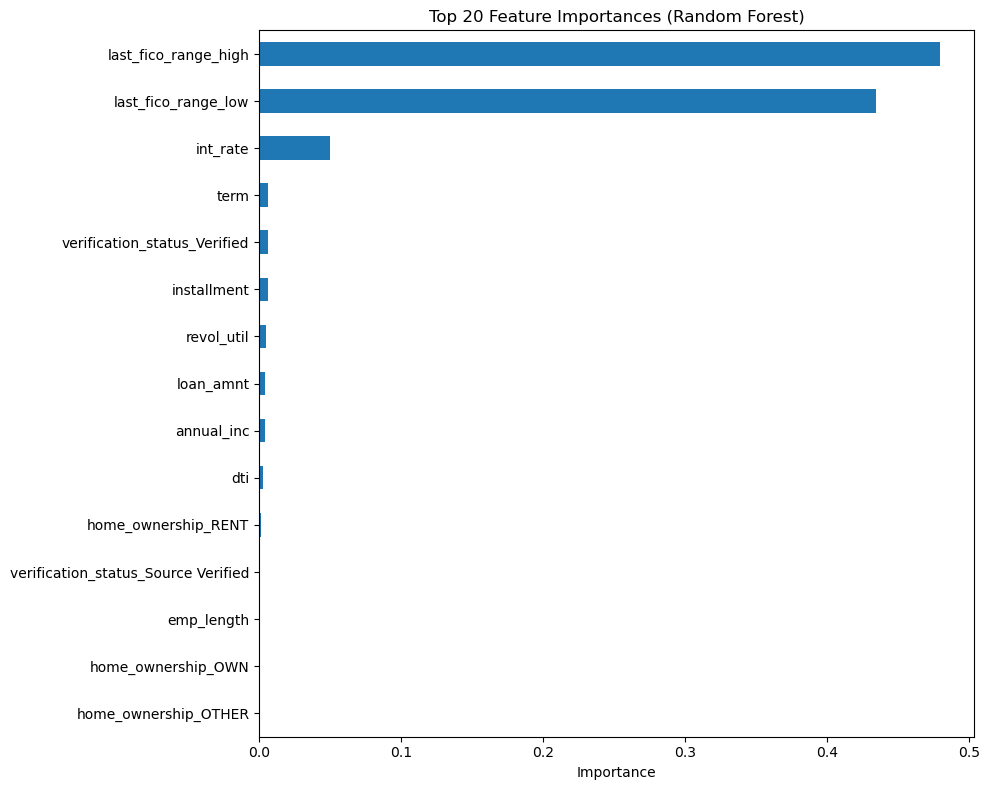

In [28]:
!pip install shap

import shap
import matplotlib.pyplot as plt
import pandas as pd

# 1. Feature Importance (Random Forest 내부 중요도 기준)
importances = rf.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.Series(importances, index=feature_names).sort_values(ascending=True).tail(20)

plt.figure(figsize=(10, 8))
feature_importance_df.plot(kind='barh')
plt.title("Top 20 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [33]:
print(X_train.columns)
print(X_val.columns)

Index(['loan_amnt', 'term', 'installment', 'emp_length', 'annual_inc', 'dti',
       'last_fico_range_high', 'last_fico_range_low', 'revol_util', 'int_rate',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified'],
      dtype='object')
Index(['loan_amnt', 'term', 'installment', 'emp_length', 'annual_inc', 'dti',
       'last_fico_range_high', 'last_fico_range_low', 'revol_util', 'int_rate',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified'],
      dtype='object')


In [38]:
# 1. SHAP explainer 생성
explainer = shap.TreeExplainer(rf)

# 2. SHAP 값 계산
shap_values = explainer.shap_values(X_val)

# 3. 클래스 1 (default=1)의 기여도만 추출 (3차원 → 2차원)
if isinstance(shap_values, list):  # 이진 분류인 경우
    shap_values = shap_values[1]
elif shap_values.ndim == 3:
    shap_values = shap_values[:, :, 1]

# 4. shap_values와 X_val의 차원이 맞는지 확인
assert shap_values.shape[1] == X_val.shape[1], f"Mismatch: {shap_values.shape[1]} vs {X_val.shape[1]}"

# 5. DataFrame으로 변환
shap_df = pd.DataFrame(shap_values, columns=X_val.columns)

# 6. 평균 절댓값으로 feature importance 정리
shap_importance = shap_df.abs().mean().sort_values(ascending=False)
shap_summary = shap_importance.to_frame(name="mean_abs_shap_value")

# 7. 결과 출력
display(shap_summary.head(30))

,mean_abs_shap_value
last_fico_range_high,0.182226
last_fico_range_low,0.163513
int_rate,0.029121
term,0.010621
verification_status_Verified,0.010019
installment,0.007666
loan_amnt,0.006373
annual_inc,0.004617
dti,0.003448
revol_util,0.003016


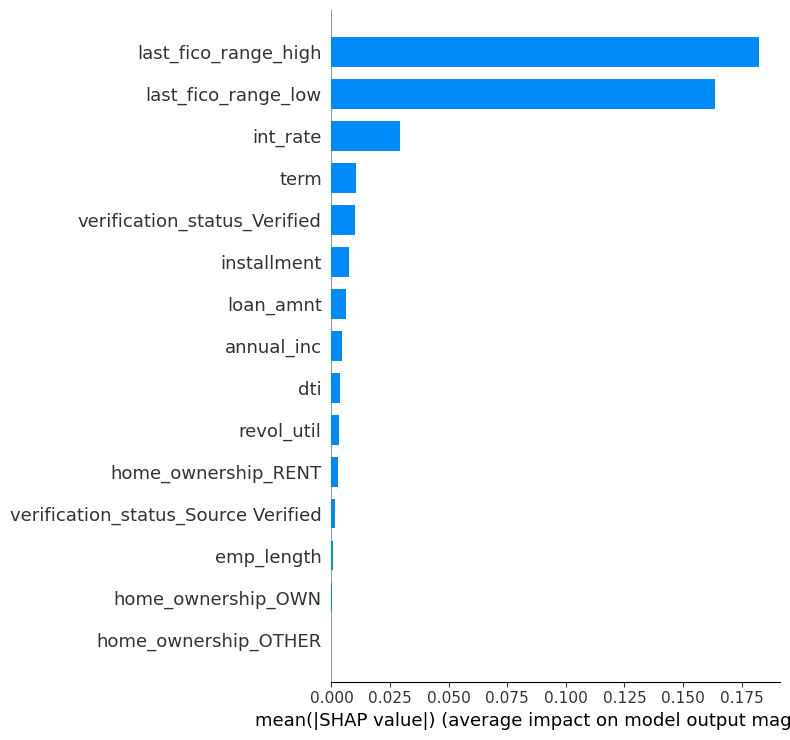

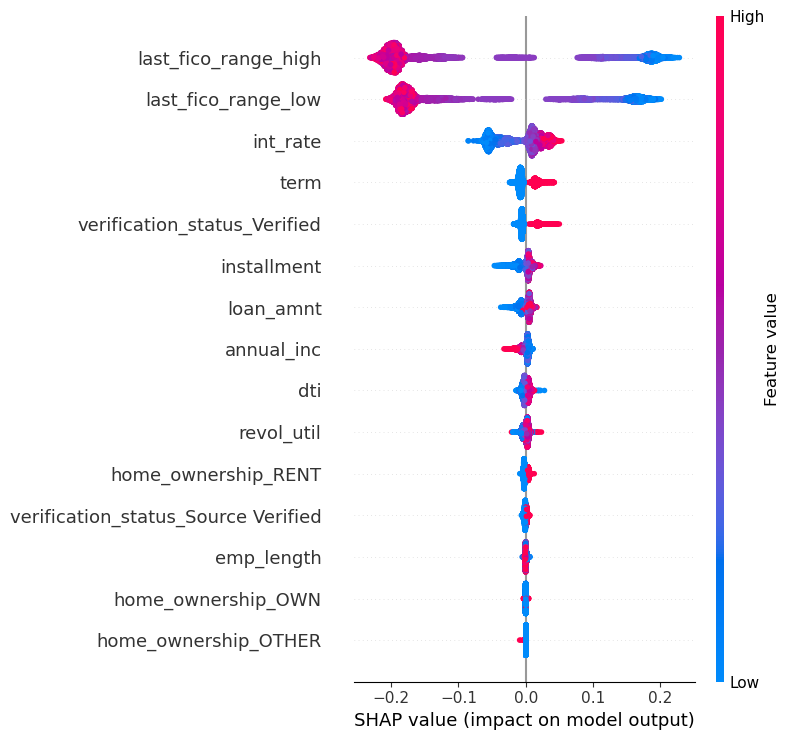

In [39]:
# 1. summary plot (bar 형식: 중요도 순위만)
shap.summary_plot(shap_values, X_val, plot_type="bar", max_display=20)

# 2. summary plot (dot 형식: 각 변수의 SHAP 분포까지)
shap.summary_plot(shap_values, X_val, max_display=30)